In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('dataset/data.csv',encoding='ISO-8859-1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# dropping all rows that have na values

data = data.dropna()
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# dropping InvoiceNo and StockCode columns are irrelevant
data.drop(['InvoiceNo','StockCode'],axis=1,inplace=True)
data.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
# regular expression to remove punctuation and lowers capital letters
import re
def clean(description):
    return re.sub(r'[^\w\s]','',description).lower()

In [6]:
clean('HI.!!!')

'hi'

In [7]:
# using the apply function
data['Description'] = data['Description'].apply(clean)
data.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,white hanging heart tlight holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,red woolly hottie white heart,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
# reset the index
data = data.reset_index().drop('index',axis=1)

In [9]:
# total 
data['Total'] = data['UnitPrice'] * data['Quantity']

In [10]:
# Vectorise the description
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

In [11]:
descriptions = vectorizer.fit_transform(data['Description'])
descriptions

<406829x2093 sparse matrix of type '<class 'numpy.int64'>'
	with 1640936 stored elements in Compressed Sparse Row format>

In [12]:
# Cluster the Products & Create Features
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(descriptions)

KMeans(n_clusters=5)

In [13]:
# assign through the kmeans
data['Product'] = kmeans.labels_
data.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Product
0,white hanging heart tlight holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,1
1,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,1
2,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,1
3,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,1
4,red woolly hottie white heart,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2


In [14]:
# Create a new dataframe called customers
customers = pd.DataFrame({'CustomerID':data['CustomerID'].unique()})
customers.head()

,CustomerID
0,17850.0
1,13047.0
2,12583.0
3,13748.0
4,15100.0


In [15]:
# create 5 columns, one for each product category and set to 0
customers['Product0'] = 0
customers['Product1'] = 0
customers['Product2'] = 0
customers['Product3'] = 0
customers['Product4'] = 0
customers.head()

,CustomerID,Product0,Product1,Product2,Product3,Product4
0,17850.0,0,0,0,0,0
1,13047.0,0,0,0,0,0
2,12583.0,0,0,0,0,0
3,13748.0,0,0,0,0,0
4,15100.0,0,0,0,0,0


In [16]:
from tqdm import tqdm
# For each index in the data
for index in tqdm(range(len(data))):
    # finds the customer ID of that row’s customer ID
    customerID = data.loc[index,'CustomerID']
    # finds the product category of whatever product was in that row
    product_category = data.loc[index,'Product']
    # finds the amount spent on that item
    product_price = data.loc[index,'Total']
    # ine finds the amount spent on that item
    customers_table_index = customers[customers['CustomerID']==customerID].index[0]
    # The row whose customer ID matches the one we want to target’s product column has the product price added to it.
    customers.loc[customers_table_index, 'Product'+str(product_category)] += product_price

100%|██████████| 406829/406829 [13:47<00:00, 491.64it/s] 


In [17]:
customers

,CustomerID,Product0,Product1,Product2,Product3,Product4
0,17850.0,321.30,4119.17,848.16,0.00,0.0
1,13047.0,518.38,2116.27,43.05,401.40,0.0
2,12583.0,1373.34,3977.56,1411.54,340.20,84.7
3,13748.0,52.08,866.23,0.00,29.94,0.0
4,15100.0,0.00,0.00,0.00,635.10,0.0
...,...,...,...,...,...,...
4367,13436.0,0.00,121.04,33.95,41.90,0.0
4368,15520.0,0.00,343.50,0.00,0.00,0.0
4369,13298.0,0.00,360.00,0.00,0.00,0.0
4370,14569.0,13.85,211.89,1.65,0.00,0.0


In [18]:
# Creating Purchase History Descriptions
customers['PurchaseCount'] = 0
customers['PurchaseMin'] = 0
customers['PurchaseMax'] = 0
customers['PurchaseMean'] = 0
customers['PurchaseSum'] = 0
customers.head()

,CustomerID,Product0,Product1,Product2,Product3,Product4,PurchaseCount,PurchaseMin,PurchaseMax,PurchaseMean,PurchaseSum
0,17850.0,321.30,4119.17,848.16,0.00,0.0,0,0,0,0,0
1,13047.0,518.38,2116.27,43.05,401.40,0.0,0,0,0,0,0
2,12583.0,1373.34,3977.56,1411.54,340.20,84.7,0,0,0,0,0
3,13748.0,52.08,866.23,0.00,29.94,0.0,0,0,0,0,0
4,15100.0,0.00,0.00,0.00,635.10,0.0,0,0,0,0,0


In [19]:
from tqdm import tqdm
# iterates over all the rows in customers. Since each row is a unique customer, we don’t have to add a .unique()
for index in tqdm(range(len(customers))):
    # stores the Customer ID of a certain row into customerID
    customerID = customers.loc[index,'CustomerID']
    # selects the Total column, which can be thought of as the ‘purchase record’ for that customer
    history = data[data['CustomerID']==customerID]['Total']
    # these five lines simply fills in a row’s history attributes with attributes from history
    customers.loc[index,'PurchaseCount'] = history.count()
    customers.loc[index,'PurchaseMin'] = history.min()
    customers.loc[index,'PurchaseMax'] = history.max()
    customers.loc[index,'PurchaseMean'] = history.mean()
    customers.loc[index,'PurchaseSum'] = history.sum()

100%|██████████| 4372/4372 [00:22<00:00, 192.33it/s]


In [20]:
customers

,CustomerID,Product0,Product1,Product2,Product3,Product4,PurchaseCount,PurchaseMin,PurchaseMax,PurchaseMean,PurchaseSum
0,17850.0,321.30,4119.17,848.16,0.00,0.0,312,-30.60,107.25,16.950737,5288.63
1,13047.0,518.38,2116.27,43.05,401.40,0.0,196,-15.00,68.00,15.709694,3079.10
2,12583.0,1373.34,3977.56,1411.54,340.20,84.7,251,-60.84,132.80,28.634821,7187.34
3,13748.0,52.08,866.23,0.00,29.94,0.0,28,9.36,204.00,33.866071,948.25
4,15100.0,0.00,0.00,0.00,635.10,0.0,6,-131.40,350.40,105.850000,635.10
...,...,...,...,...,...,...,...,...,...,...,...
4367,13436.0,0.00,121.04,33.95,41.90,0.0,12,10.20,25.50,16.407500,196.89
4368,15520.0,0.00,343.50,0.00,0.00,0.0,18,9.48,34.68,19.083333,343.50
4369,13298.0,0.00,360.00,0.00,0.00,0.0,2,90.00,270.00,180.000000,360.00
4370,14569.0,13.85,211.89,1.65,0.00,0.0,12,1.65,122.40,18.949167,227.39


In [21]:
# By default, Foreign will be 0, because the majority of sales are from the United Kingdom.
customers['Foreign'] = 0

In [22]:
for index in tqdm(range(len(customers))):
    # retrieves the customer ID to query the data DataFrame.
    customerID = customers.loc[index,'CustomerID']
    # selects the rows whose CustomerID column is equal to the assigned customerID
    # because this data subset was taken from data
    # its original indices are maintained, meaning that the first row probably won’t be of index 0.
    # To solve this issue, we can use .reset_index(), which ensures that the first row has index 0
    customerCountry = data[data['CustomerID']==customerID] .reset_index().loc[0,'Country']
    # if it is not equal to ‘United Kingdom’, then we will assign the ‘Foreign’ column in that cell to 1
    if customerCountry == 'United Kingdom':
        customers.loc[index,'Foreign'] = 1

100%|██████████| 4372/4372 [00:17<00:00, 255.62it/s]


In [23]:
customers

,CustomerID,Product0,Product1,Product2,Product3,Product4,PurchaseCount,PurchaseMin,PurchaseMax,PurchaseMean,PurchaseSum,Foreign
0,17850.0,321.30,4119.17,848.16,0.00,0.0,312,-30.60,107.25,16.950737,5288.63,1
1,13047.0,518.38,2116.27,43.05,401.40,0.0,196,-15.00,68.00,15.709694,3079.10,1
2,12583.0,1373.34,3977.56,1411.54,340.20,84.7,251,-60.84,132.80,28.634821,7187.34,0
3,13748.0,52.08,866.23,0.00,29.94,0.0,28,9.36,204.00,33.866071,948.25,1
4,15100.0,0.00,0.00,0.00,635.10,0.0,6,-131.40,350.40,105.850000,635.10,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4367,13436.0,0.00,121.04,33.95,41.90,0.0,12,10.20,25.50,16.407500,196.89,1
4368,15520.0,0.00,343.50,0.00,0.00,0.0,18,9.48,34.68,19.083333,343.50,1
4369,13298.0,0.00,360.00,0.00,0.00,0.0,2,90.00,270.00,180.000000,360.00,1
4370,14569.0,13.85,211.89,1.65,0.00,0.0,12,1.65,122.40,18.949167,227.39,1


Converted user/product centric data into data purely ordered by a customer while retaining important information and setting up the stage to make K Means and analysis easy

In [24]:
# K Means is distance-based, we need to scale the data. This means putting everything on a scale from -1 to 1.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_customers = scaler.fit_transform(customers)

In [25]:
# convert it into a DataFrame
scaled_customers = pd.DataFrame(scaled_customers, columns=customers.columns)
scaled_customers

,CustomerID,Product0,Product1,Product2,Product3,Product4,PurchaseCount,PurchaseMin,PurchaseMax,PurchaseMean,PurchaseSum,Foreign
0,1.480857,0.113377,0.507430,0.700976,-0.149546,-0.152539,0.941929,0.019410,-0.027050,-0.093381,0.412510,0.326857
1,-1.308028,0.291646,0.150262,-0.151496,0.556568,-0.152539,0.442886,0.024834,-0.040674,-0.103129,0.143658,0.326857
2,-1.577452,1.065000,0.482177,1.297499,0.448909,-0.070619,0.679501,0.008896,-0.018181,-0.001604,0.643541,-3.059443
3,-0.900989,-0.130145,-0.072652,-0.197079,-0.096878,-0.152539,-0.279865,0.033304,0.006533,0.039487,-0.115620,0.326857
4,-0.115944,-0.177254,-0.227123,-0.197079,0.967676,-0.152539,-0.374511,-0.015637,0.057349,0.604912,-0.153723,0.326857
...,...,...,...,...,...,...,...,...,...,...,...,...
4367,-1.082153,-0.177254,-0.205539,-0.161132,-0.075839,-0.152539,-0.348699,0.033596,-0.055426,-0.097648,-0.207044,0.326857
4368,0.127931,-0.177254,-0.165869,-0.197079,-0.149546,-0.152539,-0.322886,0.033346,-0.052239,-0.076630,-0.189205,0.326857
4369,-1.162284,-0.177254,-0.162926,-0.197079,-0.149546,-0.152539,-0.391720,0.061343,0.029442,1.187352,-0.187197,0.326857
4370,-0.424272,-0.164726,-0.189338,-0.195332,-0.149546,-0.152539,-0.348699,0.030624,-0.021791,-0.077684,-0.203333,0.326857


In [26]:
# create 6 K-Means models, where each one has clusters of 2, 3, 4, 5, 6, or 7. 
# We save the silhouette scores to a list, scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
cluster_nums = [2,3,4,5,6,7]
scores = []
for cluster_num in cluster_nums:
    kmeans = KMeans(cluster_num)
    kmeans.fit(scaled_customers)
    clusters = kmeans.predict(scaled_customers)
    silhouette = silhouette_score(scaled_customers, clusters)
    scores.append(silhouette)

<AxesSubplot:xlabel='Clusters', ylabel='Silhouette Score'>

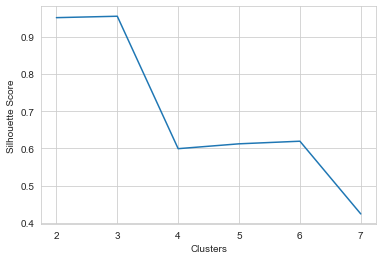

In [27]:
# Plotting it
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
plt.ylabel('Silhouette Score')
plt.xlabel('Clusters')
sns.lineplot(x=cluster_nums,y=scores)

In [28]:
# train a three-cluster model for our cluster centers.
kmeans = KMeans(3)
kmeans.fit(scaled_customers)

KMeans(n_clusters=3)

In [29]:
kmeans.cluster_centers_

array([[-4.31044124e-04, -3.12155902e-02, -3.13062612e-02,
        -2.98735638e-02, -2.40521659e-02, -1.47403710e-02,
        -1.11451936e-02,  1.42174581e-02, -1.50701050e-02,
        -2.47250920e-03, -3.25116018e-02,  2.50466157e-03],
       [ 1.73637008e-01,  1.94860129e+01,  1.95495900e+01,
         1.86521873e+01,  1.50161712e+01,  9.21135980e+00,
         7.00296290e+00, -4.99816459e-01,  1.05045720e+00,
         1.57298034e+00,  2.03016112e+01, -1.60817143e+00],
       [ 6.65617502e-01, -1.77254405e-01, -2.26606162e-01,
        -1.97078914e-01, -1.49546293e-01, -1.52539482e-01,
        -3.83115516e-01, -5.85462720e+01,  5.84127379e+01,
        -2.20832251e-01, -2.30648122e-01,  3.26856915e-01]])

Convert this into a heatmap

The first line sets the figure size. The second creates a heatmap with the data __scaler.inverse_transform(kmeans.cluster_centers_)[:,0:11].__ 

Using __.inverse_transform__ can help ‘unscale’ the cluster centers so they can actually be interpretable. 

Because cluster was an extra attribute at the end that we don’t need (index 12 in columns), [:,0:11] only selects the first 12 columns. 

Setting the parameter _annot_ to True labels the heatmap, and setting the _yticklabels_ and _xticklabels_ parameters label the _y_ and _x_ axes, respectively.

<AxesSubplot:>

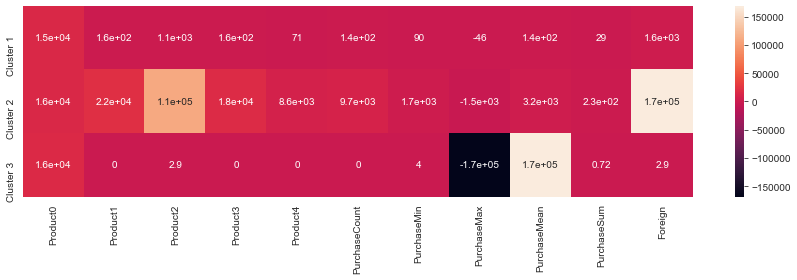

In [33]:
plt.figure(figsize=(15,3.5))
sns.heatmap(scaler.inverse_transform(kmeans.cluster_centers_)[:,0:11],annot=True,yticklabels=['Cluster 1','Cluster 2','Cluster 3'],xticklabels=scaled_customers.columns.drop('CustomerID'))